<a href="https://colab.research.google.com/github/EddyKubwimana/83082025_Churning_Customers/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Getting library necessary for the project**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
from matplotlib  import  pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, Nadam,Adamax,Adagrad,RMSprop,SGD,Adadelta
from keras.layers import Input,Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import shap
import matplotlib.pyplot as plt

# **Data loading**

In [4]:
customerdata = pd.read_csv("/content/drive/MyDrive/IntroAi/CustomerChurn_dataset.csv")

#**Data inspection**

In [5]:
#inspecting data
customerdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**verifying if the dataset have  missing values**

In [6]:
# The data does not have a missing values, there is no need for imputatation
customerdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#**Separation of categorical and numerical variables**

In [7]:
#separation of categorical  from the dataset

categoricaldata = customerdata.select_dtypes(include = ["object"])

In [8]:
# inspecting categorical  and check if there is missing values
categoricaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [9]:
numericaldata = customerdata.select_dtypes(exclude = ["object"])

In [10]:
numericaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


#**Data Analysis and visualisation**

Numerical data visualization

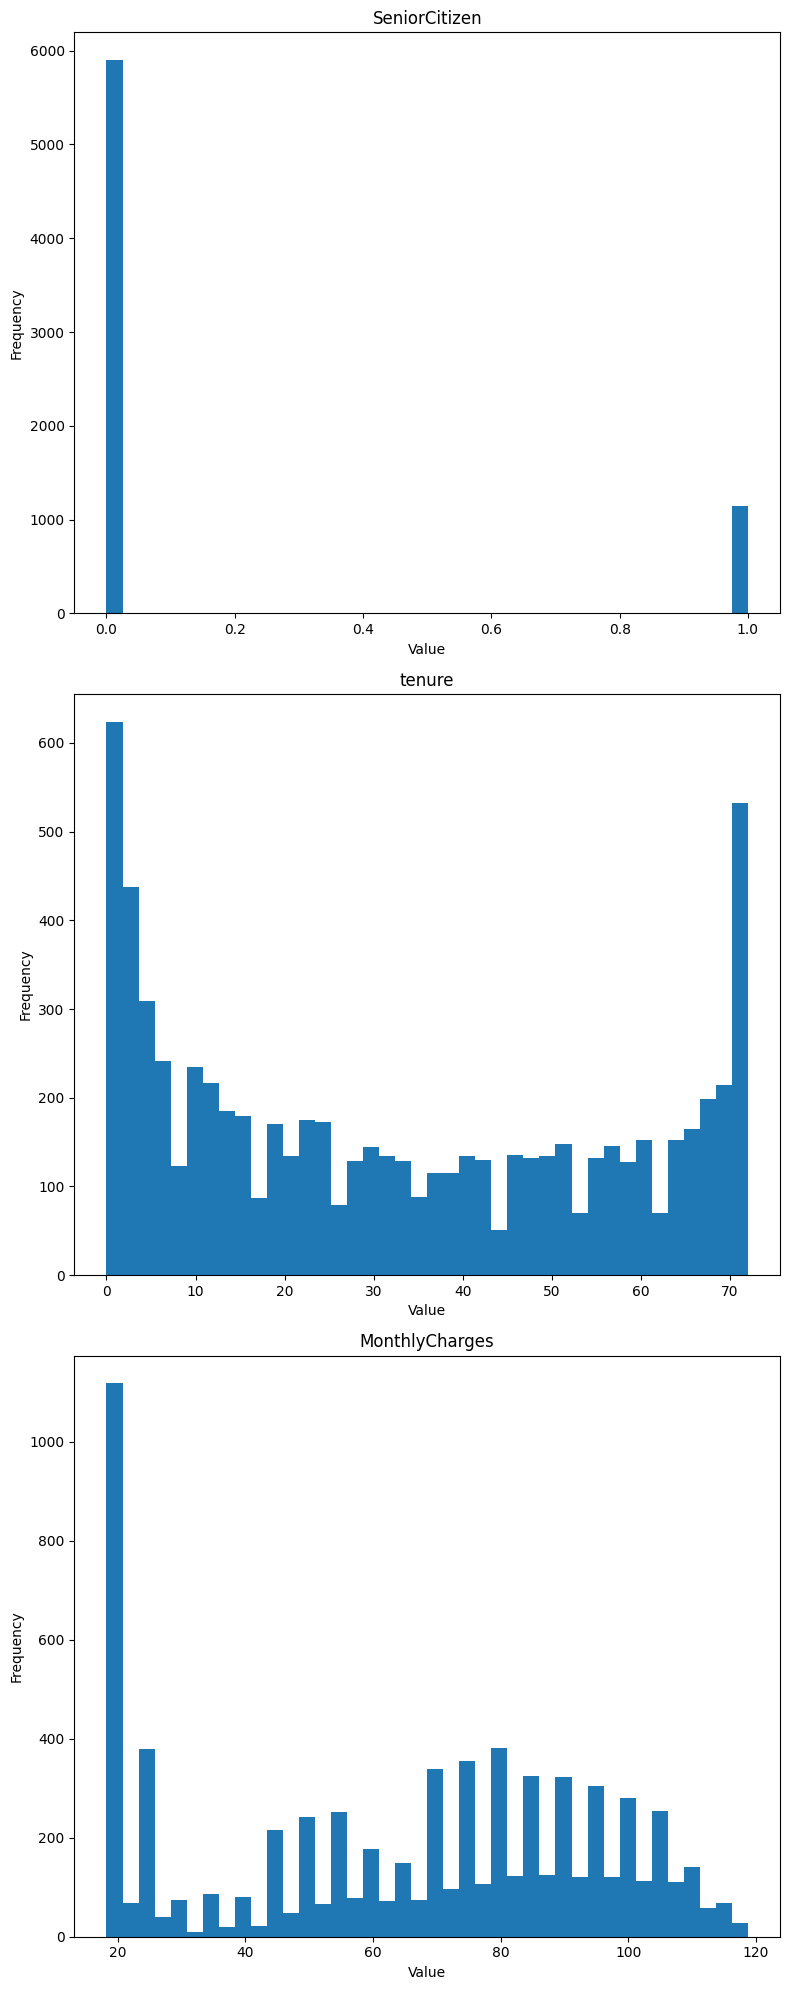

In [11]:
num_columns = len(numericaldata.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(8, 20))

for i in range(num_columns):
    column_name = numericaldata.columns[i]
    axes[i].hist(numericaldata[column_name], bins=40)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

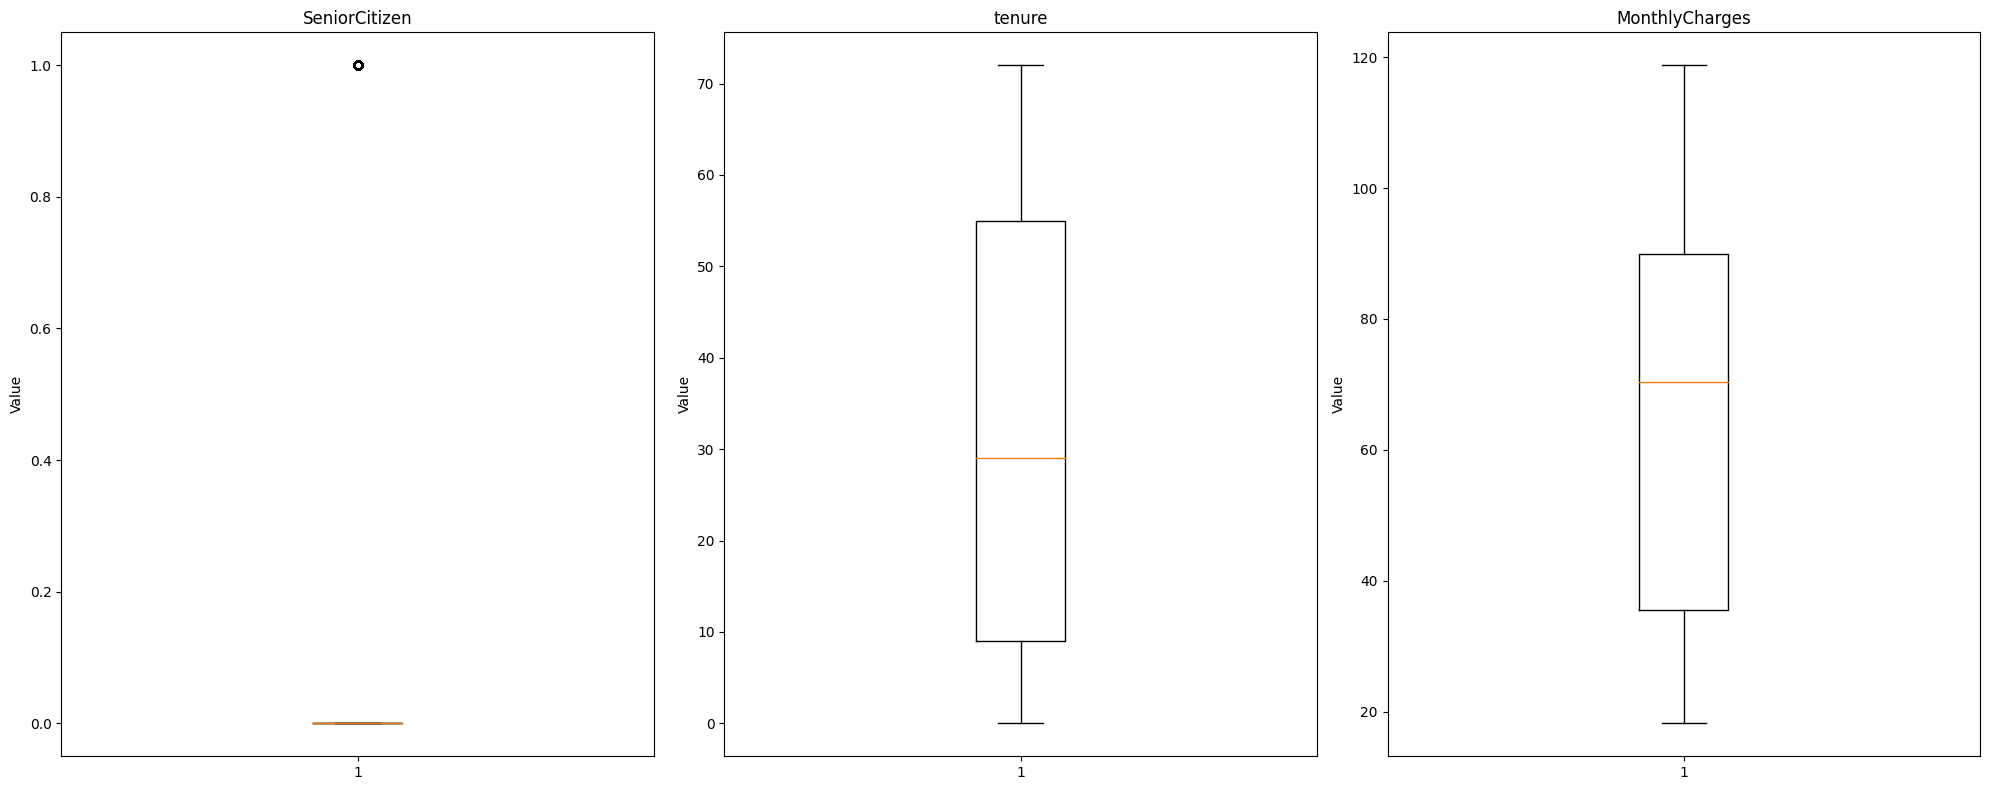

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i in range(num_columns):
    column_name = numericaldata.columns[i]
    axes[i].boxplot(numericaldata[column_name])
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()




```
# This is formatted as code
```

 categorical data visualisation

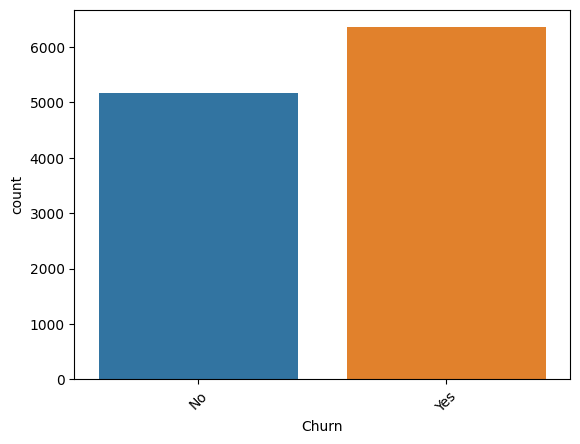

In [13]:
for i in categoricaldata.columns:
  sns.countplot(x = categoricaldata[i],data=categoricaldata)
  plt.xticks(rotation=45)

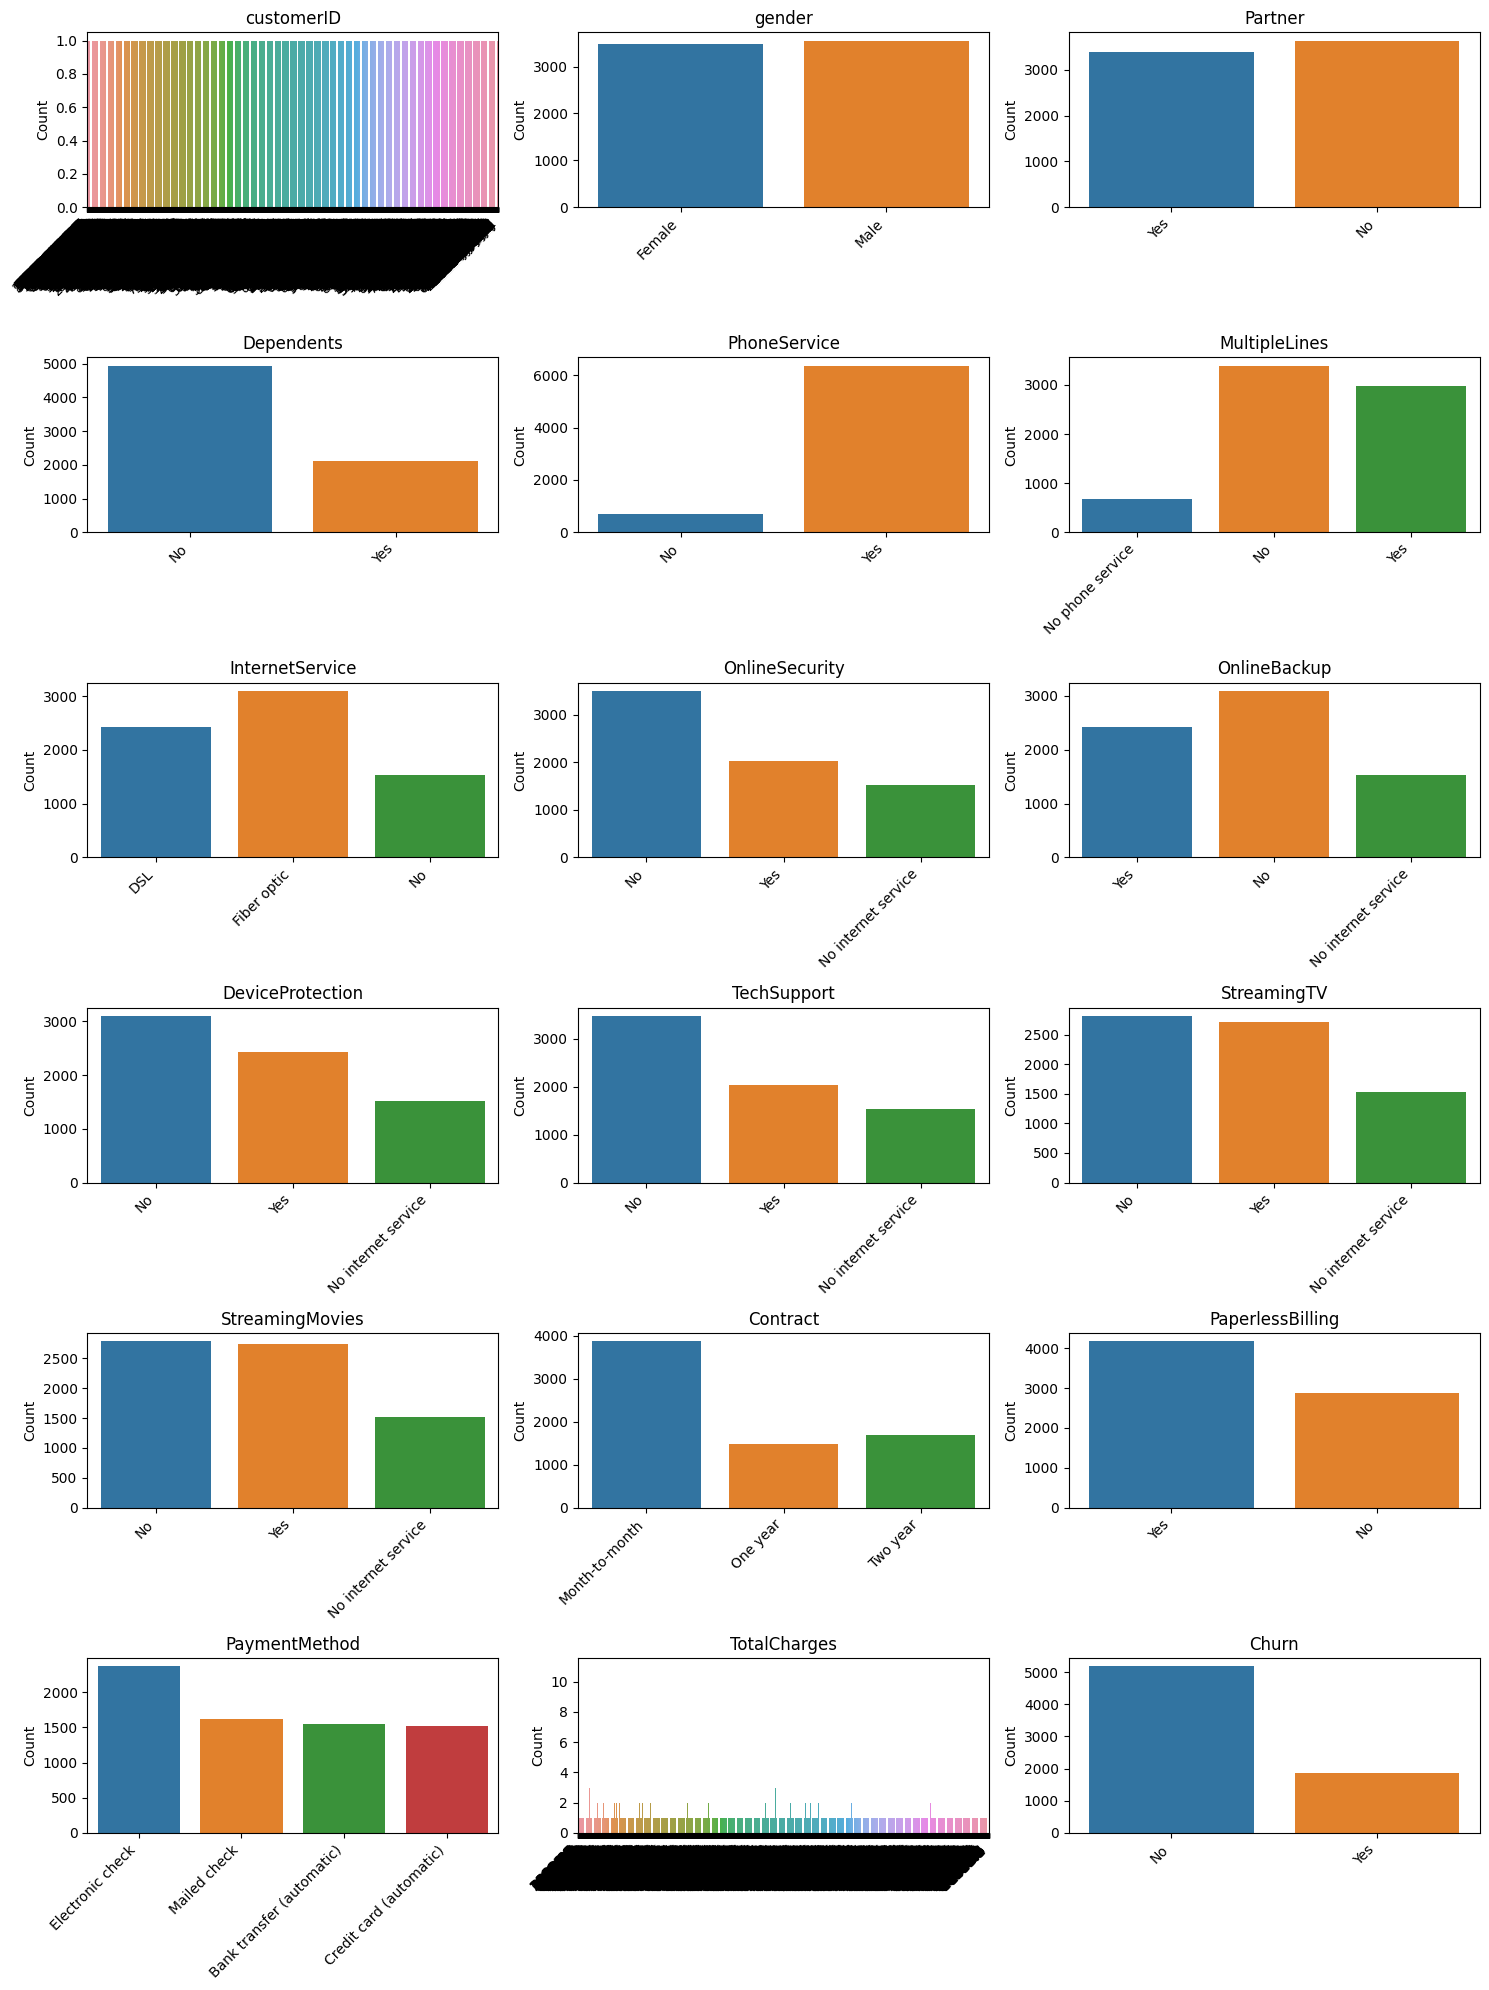

In [14]:

num_rows = 6
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(categoricaldata.columns[:18]):
    ax = axes[i]
    sns.countplot(x=column, data=categoricaldata, ax=ax)
    ax.set_title(column, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

for i in range(18, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


After visualisation, I spotted that The total charges is categorical data but it should be a numerical data and I have also saw that CustomerId is meaningless because it does not have a meaning that can influence the churn variable. For that reason, I will convert total charges into a numerical data and drop customerID

In [15]:
#conversion of TotalCharges into float datatype
TotalCharges =[]
counter = 0

for i in categoricaldata["TotalCharges"]:

   if i != " ":
     TotalCharges.append(float(i))
   else:
      TotalCharges.append(np.nan)




In [16]:
# Dropping of customerId and totalCharges
categoricaldata.drop(["TotalCharges","customerID"], axis = 1, inplace = True)

In [17]:
# look up for the new dataframe
categoricaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


Adding the total charge columns to numericaldata dataframe

In [18]:
numericaldata["TotalCharges"] = TotalCharges

In [19]:
#inspecting the numerical data
numericaldata.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


visualization of the TotalCharges columns after converting it into numerical data

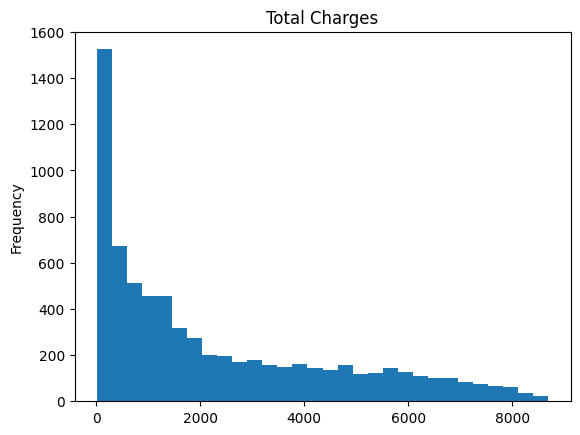

In [20]:
plt.hist(numericaldata["TotalCharges"], bins=30)
plt.ylabel('Frequency')
plt.title('Total Charges')
plt.show()

# dataframe of encoding categorical data

Categorical data encoding using factorization

In [21]:
for i in categoricaldata.columns:
     categoricaldata[i] = pd.factorize(categoricaldata[i])[0]



fill by the  median any np.nan found in total monthly charges due to the distribution of the data in Total Monthly charges that I added in the code above in numerical data

In [22]:

numericaldata["TotalCharges"].fillna(numericaldata["TotalCharges"].median(), inplace = True)

In [23]:
finaldata = pd.concat([numericaldata, categoricaldata], axis =1)

In [24]:
#Look up of the model final dataframe for training and testing
finaldata.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,0,2,53.85,108.15,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,0,45,42.30,1840.75,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,2,70.70,151.65,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1


In [25]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   int64  
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   int64  


#**Separation of independent and dependent variables**

In [26]:
x = finaldata.drop(["Churn"],axis =1)
y = finaldata["Churn"]

# **Scaling independent variables**

In [27]:
scaled = StandardScaler()

scaledata = scaled.fit_transform(x)

xdata = pd.DataFrame(scaledata, columns = x.columns)

#**Splitting dataset into training and testing datasets**

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(xdata,y, test_size = 0.1, random_state =42, stratify= y)

In [29]:
xtrain.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5769,-0.439916,1.572981,1.470302,2.375109,-1.009559,-1.034530,1.529024,0.327438,1.050276,0.172250,0.351386,-1.180777,0.286059,-0.909172,0.238887,0.234693,1.570749,-0.829798,0.595711
1834,2.273159,-1.277445,-0.653475,-0.987509,0.990532,0.966622,-0.654012,0.327438,-0.505697,-1.183234,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,1.205113,-1.145198
3168,-0.439916,0.717853,-1.509300,-0.551372,-1.009559,0.966622,-0.654012,0.327438,-0.505697,1.527734,1.606361,1.528087,1.570134,1.603896,1.549232,1.547597,0.371271,-0.829798,-0.274744
4205,-0.439916,-0.340876,0.459929,-0.192162,-1.009559,-1.034530,1.529024,0.327438,1.050276,-1.183234,0.351386,0.173655,0.286059,-0.909172,0.238887,0.234693,1.570749,1.205113,1.466165
6218,-0.439916,1.532261,-0.211437,0.808452,-1.009559,-1.034530,1.529024,-3.054010,-2.061669,-1.183234,-0.903589,-1.180777,0.286059,0.347362,0.238887,0.234693,0.371271,-0.829798,0.595711


Epoch 1/100
302/302 [==============================] - 7s 4ms/step - loss: 0.5170 - accuracy: 0.7414 - val_loss: 0.4325 - val_accuracy: 0.8000
Epoch 2/100
302/302 [==============================] - 1s 4ms/step - loss: 0.4495 - accuracy: 0.7835 - val_loss: 0.4238 - val_accuracy: 0.8099
Epoch 3/100
302/302 [==============================] - 2s 5ms/step - loss: 0.4435 - accuracy: 0.7916 - val_loss: 0.4224 - val_accuracy: 0.8085
Epoch 4/100
302/302 [==============================] - 2s 5ms/step - loss: 0.4374 - accuracy: 0.7949 - val_loss: 0.4230 - val_accuracy: 0.8014
Epoch 5/100
302/302 [==============================] - 2s 5ms/step - loss: 0.4349 - accuracy: 0.7932 - val_loss: 0.4218 - val_accuracy: 0.8071
Epoch 6/100
302/302 [==============================] - 2s 5ms/step - loss: 0.4376 - accuracy: 0.7881 - val_loss: 0.4227 - val_accuracy: 0.7986
Epoch 7/100
302/302 [==============================] - 1s 4ms/step - loss: 0.4372 - accuracy: 0.7914 - val_loss: 0.4208 - val_accuracy: 0.8113

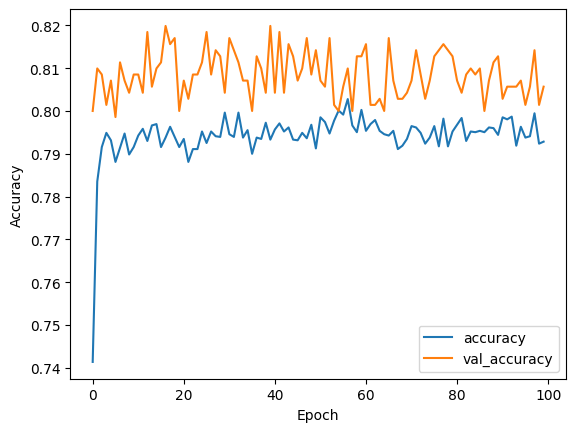

In [30]:

input_layer = Input(shape=(xtrain.shape[1],))
hidden_layer1 = Dense(12, activation="tanh")(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(xtrain, ytrain, epochs=100, batch_size=21, validation_split=0.2, validation_data=(xtest, ytest))

# Evaluate and print results
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
accuracy = model.evaluate(xtest,ytest)

23/23 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8057


In [32]:
prediction = model.predict(xtest)


23/23 [==============================] - 0s 3ms/step


In [33]:
print(roc_auc_score(ytest,prediction))

0.8503602915367621


In [34]:
# class prediction : 0 or 1
predictions = (prediction>0.5).astype(int)

In [35]:
print(accuracy_score(ytest,predictions))

0.8056737588652483


#Finding features with high importances to our target variable so that I train the model with the high importance features by passing neural network I trained in shap library

PermutationExplainer explainer: 706it [00:16, 19.46it/s]                         


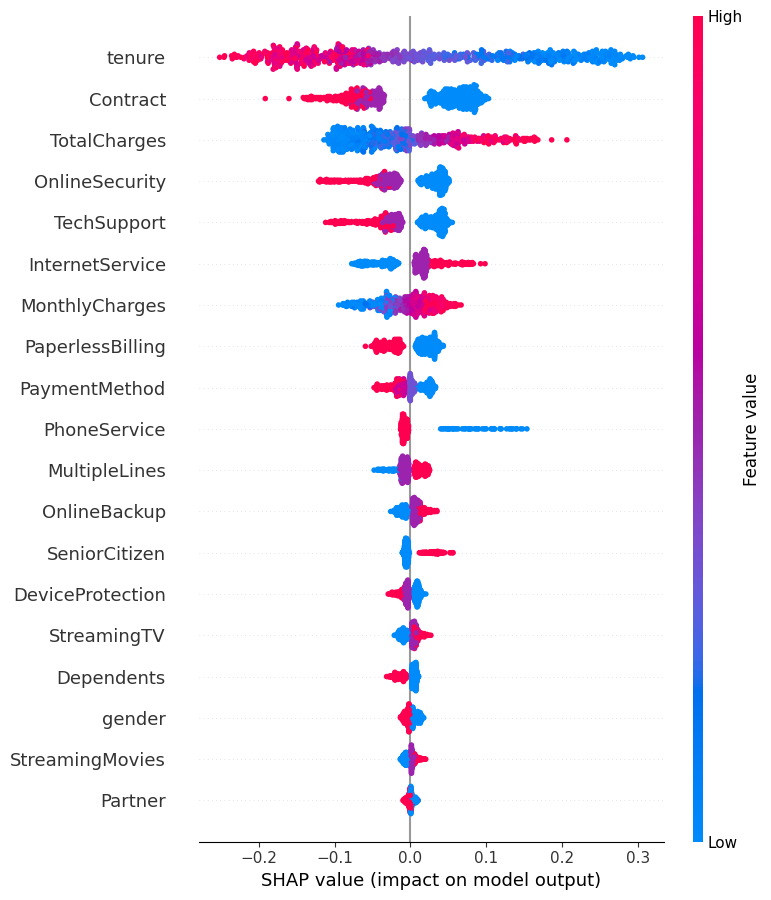

In [36]:
explainer = shap.Explainer(model,xtrain.to_numpy())
shap_values = explainer.shap_values(xtest.to_numpy())
shap.summary_plot(shap_values, xtest, feature_names=xtrain.columns)

Looking at the output shap output, we can see that the line have positive and negative coordinate that show the level of influence of each variable to the the customer churn. From that,  I decided on important feauture that I will have to use throughtout the project.

#**Training the model with high importance features to our target variable**

I created a variable called retainedda that will encoded and cleaned data we use in the model above

In [37]:
# I used the final data variable I encoded above. I extracted the feauture with high importance, the dataset is encode
# It is yet to scaled
retaineddata = finaldata[["tenure","TotalCharges","InternetService","Contract","OnlineSecurity","TechSupport","PaymentMethod","MonthlyCharges"]]

In [38]:
#Inspecting the values and class of each column for later use in the app that will be deployed

checking_value = customerdata[["tenure","TotalCharges","InternetService","Contract","OnlineSecurity","TechSupport","PaymentMethod","MonthlyCharges"]]

Cheching the 5 first element in the original dataset of high importance feautures

In [39]:
checking_value.head(5)

,tenure,TotalCharges,InternetService,Contract,OnlineSecurity,TechSupport,PaymentMethod,MonthlyCharges
0,1,29.85,DSL,Month-to-month,No,No,Electronic check,29.85
1,34,1889.5,DSL,One year,Yes,No,Mailed check,56.95
2,2,108.15,DSL,Month-to-month,Yes,No,Mailed check,53.85
3,45,1840.75,DSL,One year,Yes,Yes,Bank transfer (automatic),42.30
4,2,151.65,Fiber optic,Month-to-month,No,No,Electronic check,70.70


Cheching the 5 first element in the original dataset of high importance feautures from finaldata that was used to train the above ANN.

In [40]:
retaineddata.head(5)

,tenure,TotalCharges,InternetService,Contract,OnlineSecurity,TechSupport,PaymentMethod,MonthlyCharges
0,1,29.85,0,0,0,0,0,29.85
1,34,1889.50,0,1,1,0,1,56.95
2,2,108.15,0,0,1,0,1,53.85
3,45,1840.75,0,1,1,1,2,42.30
4,2,151.65,1,0,0,0,0,70.70


In [41]:
retaineddata["Churn"] = finaldata[["Churn"]]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Final dataset to be used throughout the training and testing of the the models below

In [42]:

retaineddata

,tenure,TotalCharges,InternetService,Contract,OnlineSecurity,TechSupport,PaymentMethod,MonthlyCharges,Churn
0,1,29.85,0,0,0,0,0,29.85,0
1,34,1889.50,0,1,1,0,1,56.95,0
2,2,108.15,0,0,1,0,1,53.85,1
3,45,1840.75,0,1,1,1,2,42.30,0
4,2,151.65,1,0,0,0,0,70.70,1
...,...,...,...,...,...,...,...,...,...
7038,24,1990.50,0,1,1,1,1,84.80,0
7039,72,7362.90,1,1,0,0,3,103.20,0
7040,11,346.45,0,0,1,0,0,29.60,0
7041,4,306.60,1,0,0,0,1,74.40,1


Separation of X,Y variables and and scaling of the X data

In [43]:
X = retaineddata.drop(["Churn"], axis = 1)
Y = retaineddata["Churn"]
finalScaler = StandardScaler()
X = finalScaler.fit_transform(X)

In [44]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size = 0.2, random_state=42, stratify =Y)

Epoch 1/50
269/269 [==============================] - 2s 4ms/step - loss: 0.4923 - accuracy: 0.7561 - val_loss: 0.4361 - val_accuracy: 0.7864
Epoch 2/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4504 - accuracy: 0.7861 - val_loss: 0.4336 - val_accuracy: 0.7871
Epoch 3/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4457 - accuracy: 0.7870 - val_loss: 0.4337 - val_accuracy: 0.7864
Epoch 4/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4372 - accuracy: 0.7906 - val_loss: 0.4336 - val_accuracy: 0.7800
Epoch 5/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4399 - accuracy: 0.7863 - val_loss: 0.4337 - val_accuracy: 0.7821
Epoch 6/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4385 - accuracy: 0.7893 - val_loss: 0.4338 - val_accuracy: 0.7878
Epoch 7/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4375 - accuracy: 0.7904 - val_loss: 0.4327 - val_accuracy: 0.7835
Epoch 

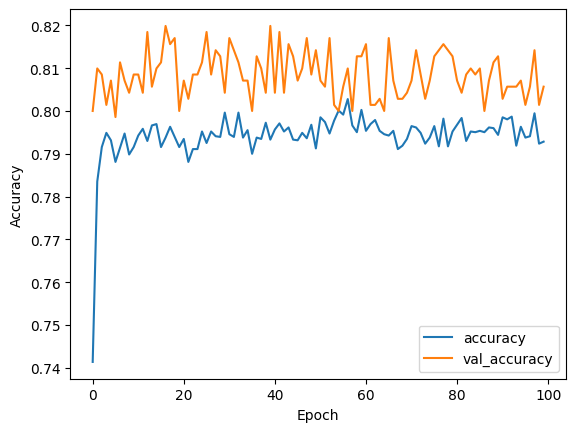

In [45]:
input_layer = Input(shape=(Xtrain.shape[1],))
hidden_layer1 = Dense(12, activation="tanh")(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

model1 = keras.Model(inputs=input_layer, outputs=output_layer)

# compeling the model

model1.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(Xtrain, Ytrain, epochs=50, batch_size=21, validation_split = 0.2,validation_data=(Xtest, Ytest))
loss1, accuracy1 = model1.evaluate(Xtest, Ytest)
print(f'Test loss: {loss1}, Test accuracy: {accuracy1}')

# code to plot the accuracy of our model and help us to detect if is overfitting or underfitting
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [57]:
prediction = model1.predict(Xtest)
predictions1 = (prediction>0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [47]:
print(roc_auc_score(Ytest,prediction))

0.8372755689891239


In [48]:
print(accuracy_score(Ytest,predictions1))

0.7892122072391767


In [49]:
pip install scikeras

GreadSearch and Cross validation process

In [50]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import keras

def create_model(learning_rate=0.01, activation='relu', neurons=3, optimizer='adam'):
    input_layer1 = Input(shape=(Xtrain.shape[1],))
    input_layer2 = Dense(3, activation = activation)(input_layer1)
    output_layer1 = Dense(1, activation='sigmoid')(input_layer2)
    model = keras.Model(inputs=input_layer1, outputs=output_layer1)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'adadelta':
        opt = Adadelta(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model,learning_rate = 0.1, activation = "relu",neurons=3, epochs=25, batch_size=21, verbose=0)


param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'neurons': [3, 6, 12],
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(Xtrain, Ytrain)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f, Std: (%f) with: %r" % (mean, stdev, param))


Best: 0.802449 using {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 12, 'optimizer': 'adam'}
Mean: 0.801917, Std: (0.010279) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'adam'}
Mean: 0.798190, Std: (0.006087) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'rmsprop'}
Mean: 0.798722, Std: (0.013562) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'sgd'}
Mean: 0.794995, Std: (0.015670) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'adam'}
Mean: 0.800674, Std: (0.009917) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'rmsprop'}
Mean: 0.795172, Std: (0.011555) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'sgd'}
Mean: 0.802449, Std: (0.011819) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 12, 'optimizer': 'adam'}
Mean: 0.796060, Std: (0.011429) with: {'activation': 'relu'

#Final trained with the best hyperparameters and optimizer

Epoch 1/1000
109/109 [==============================] - 1s 6ms/step - loss: 0.4918 - accuracy: 0.7685 - val_loss: 0.4386 - val_accuracy: 0.7892
Epoch 2/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.7820 - val_loss: 0.4318 - val_accuracy: 0.7871
Epoch 3/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.7780 - val_loss: 0.4306 - val_accuracy: 0.7892
Epoch 4/1000
109/109 [==============================] - 1s 6ms/step - loss: 0.4457 - accuracy: 0.7820 - val_loss: 0.4272 - val_accuracy: 0.7899
Epoch 5/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.7840 - val_loss: 0.4303 - val_accuracy: 0.7892
Epoch 6/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.7824 - val_loss: 0.4353 - val_accuracy: 0.7963
Epoch 7/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.7824 - val_loss: 0.4274 - val_accuracy:

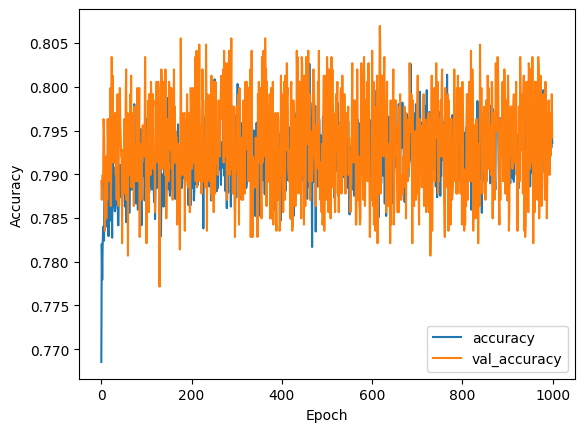

In [51]:
input_layer = Input(shape=(Xtrain.shape[1],))
hidden_layer1 = Dense(12, activation="relu")(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

finalmodel = keras.Model(inputs=input_layer, outputs=output_layer)

finalmodel.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

historyfinal = finalmodel.fit(Xtrain, Ytrain, epochs=1000, batch_size=52, validation_split = 0.2,validation_data=(Xtest, Ytest))
lossfinal, accuracyfinal = model1.evaluate(Xtest, Ytest)
print(f'Test loss: {lossfinal}, Test accuracy: {accuracyfinal}')
import matplotlib.pyplot as plt
plt.plot(historyfinal.history['accuracy'], label='accuracy')
plt.plot(historyfinal.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#**Accuracy and AUC score the final model

In [55]:

finalprediction = finalmodel.predict(Xtest)
print(roc_auc_score(Ytest,finalprediction))

45/45 [==============================] - 0s 6ms/step
0.8413172647187993


In [59]:
finaltestpred = (finalprediction>0.5).astype(int)
print(accuracy_score(Ytest,finaltestpred))

0.794180269694819


#Loading the model

In [53]:

import joblib

joblib.dump(finalScaler, '/content/drive/MyDrive/IntroAi/churnscaler.joblib')
finalmodel.save("/content/drive/MyDrive/IntroAi/finalmodel")

In [54]:
from keras.models import load_model


loaded_model = load_model("/content/drive/MyDrive/IntroAi/finalmodel")

# Verify the loaded model
loaded_model.summary()  # To check the model's architecture and summary

Model: "model_246"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_247 (InputLayer)      [(None, 8)]               0         
                                                                 
 dense_492 (Dense)           (None, 12)                108       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_493 (Dense)           (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
